**Author:** Kaetlyn Gibson

**Bio 399**
    
**Homework 1**

# Question 1
Write a function that will compute the reverse complement of
a DNA sequence which has been stored as a string. 

In [1]:
def revComplement(seq):
    DNAdict = {'A': 'T', 'G': 'C', 'T': 'A', 'C': 'G'}
    print(f" The inputted DNA seq is: {seq}\n")
    rev = ''
    revComplement = ''
    for char in seq:
        rev = char + rev
        revComplement = DNAdict[char.upper()] + revComplement
    print(f' The reversed DNA seq is: {rev}\n')
    print(f' The reversed complement seq is: {revComplement}\n')
    
    
revComplement('TACAGAT')
    

 The inputted DNA seq is: TACAGAT

 The reversed DNA seq is: TAGACAT

 The reversed complement seq is: ATCTGTA



# Question 2 
From COVID case data from http://covidtracking.com, plot data at the state level and compare growth trajectories among states.

In [2]:
# download the data
! rm daily.csv* && wget http://covidtracking.com/api/states/daily.csv

--2020-04-09 03:24:09--  http://covidtracking.com/api/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 167.172.221.254, 2604:a880:2:d1::1a9:8001
Connecting to covidtracking.com (covidtracking.com)|167.172.221.254|:80... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from covidtracking.com attempted to set domain to cape.io
Length: 237491 (232K) [text/csv]
Saving to: ‘daily.csv’

daily.csv           100%[===================>] 231.92K  --.-KB/s    in 0.001s  

2020-04-09 03:24:09 (179 MB/s) - ‘daily.csv’ saved [237491/237491]



In [3]:
# let's print the first line of this file to see what the column names are
f = open('daily.csv','r')
#print out the first line to see what things are called
print(f.readline())

date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease



Here is my job-- use that new column of information to plot the following:

1. The number of positives over time in New York versus California. You can do this in two separate plots but it's easy enough to compare two lines in the same plot by repeatedly calling `plt.plot()`
2. The number of deaths in New York versus California

3. Finally can you create a plot with a three way comparison of California, Oregon, and Washington?  


## PART ONE: NY vs. CA Positive Cases

In [4]:
#make an array for my numbers
nyPos = []
caPos = []
my_file = open('daily.csv','r') #open a handle to the file
for line in my_file: #go through every line in file
    tokens = line.split(',') #split every line by the commas
    if tokens[2] != 'positive': # test if equal to header
        if tokens[1] == 'NY': # state is NY
            nyPos.append(int(tokens[2])) # append value to list as integer
        if tokens[1] == 'CA': # state is CA
            caPos.append(int(tokens[2])) # append value to list as integer

print(f'NY data pts: {nyPos}\n')
print(f'CA data pts: {caPos}\n')

NY data pts: [149316, 138863, 130689, 122031, 113704, 102863, 92381, 83712, 75795, 66497, 59513, 52318, 44635, 37258, 30811, 25665, 20875, 15168, 10356, 7102, 4152, 2382, 1700, 950, 729, 524, 421, 216, 216, 173, 142, 105, 76, 33, 22, 6]

CA data pts: [16957, 15865, 14336, 13438, 12026, 10701, 9191, 8155, 7482, 6447, 5708, 4643, 3879, 3006, 2355, 2102, 1733, 1536, 1279, 1063, 924, 611, 483, 335, 293, 252, 202, 202, 157, 133, 114, 88, 69, 60, 53, 53]



In [5]:
nyPos.reverse() # reverse so it climbs over time
caPos.reverse() # same here

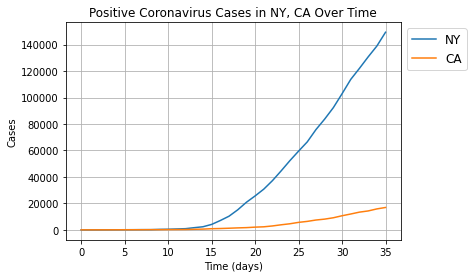

In [6]:
from matplotlib import pyplot as plt

#now plot

plt.plot(nyPos, label = 'NY') # plot points for positive NY cases
plt.plot(caPos, label = 'CA') # plot points for positive CA cases

# some graphic pazazz 
plt.grid()
plt.title('Positive Coronavirus Cases in NY, CA Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend(loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))

## PART TWO: NY vs. CA Deaths

In [7]:
#make an array for my numbers
nyDeaths = []
caDeaths = []
my_file = open('daily.csv','r') #open a handle to the file
for line in my_file: #go through every line in file
    tokens = line.split(',') #split every line by the commas
    if tokens[14] != 'death': # test if equal to header
        if tokens[14] == '': # placeholder
            tokens[14] = 0
        if tokens[1] == 'NY': # state is NY
            nyDeaths.append(int(tokens[14])) # append value to list as integer
        if tokens[1] == 'CA': # state is CA
            caDeaths.append(int(tokens[14])) # append value to list as integer

print(f'NY data pts: {nyDeaths}\n')
print(f'CA data pts: {caDeaths}\n')

NY data pts: [6268, 5489, 4758, 4159, 3565, 2935, 2373, 1941, 1550, 1218, 965, 728, 519, 385, 285, 210, 114, 114, 44, 35, 12, 12, 7, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

CA data pts: [442, 374, 343, 319, 276, 237, 203, 171, 153, 133, 123, 101, 78, 65, 53, 40, 27, 27, 24, 20, 18, 13, 11, 6, 5, 5, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0]



In [8]:
nyDeaths.reverse() # reverse so it climbs over time
caDeaths.reverse() # same here

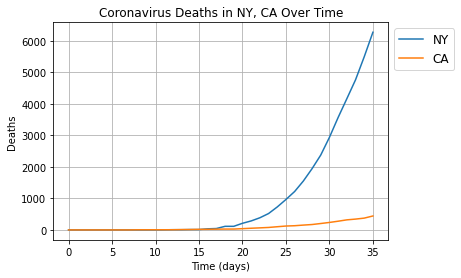

In [9]:
#now plot
plt.plot(nyDeaths, label = 'NY') # plot points for NY deaths
plt.plot(caDeaths, label = 'CA') # plot points for CA deaths

# some graphic pazazz 
plt.grid()
plt.title('Coronavirus Deaths in NY, CA Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Deaths')
plt.legend(loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))

## PART 3: Comparison of CA, OR, WA

In [10]:
#make an array for my numbers
waDeaths = []
orDeaths = []
caDeaths = []

waPos = []
orPos = []
caPos = []

my_file = open('daily.csv','r') #open a handle to the file
for line in my_file: #go through every line in file
    tokens = line.split(',') #split every line by the commas
    # POSITIVE CASES
    if tokens[2] != 'positive': # test if equal to header
        if tokens[1] == 'WA': # state is WA
            waPos.append(int(tokens[2])) # append value to list as integer
        if tokens[1] == 'OR': # state is OR
            orPos.append(int(tokens[2])) # append value to list as integer
        if tokens[1] == 'CA': # state is CA
            caPos.append(int(tokens[2])) # append value to list as integer
    # DEATHS
    if tokens[14] != 'death': # test if equal to header
        if tokens[14] == '': # placeholder
            tokens[14] = 0
        if tokens[1] == 'WA': # state is WA
            waDeaths.append(int(tokens[14])) # append value to list as integer 
        if tokens[1] == 'OR': # state is OR
            orDeaths.append(int(tokens[14])) # append value to list as integer
        if tokens[1] == 'CA': # state is CA
            caDeaths.append(int(tokens[14])) # append value to list as integer

print(f'WA data pts: \nCases: {waPos}, \nDeaths: {waDeaths}\n')
print(f'OR data pts: \nCases: {orPos}, \nDeaths: {orDeaths}\n')
print(f'CA data pts: \nCases: {caPos}, \nDeaths: {caDeaths}\n')

WA data pts: 
Cases: [8682, 8384, 7984, 7591, 6966, 6585, 5984, 5634, 4896, 4896, 4310, 3723, 3207, 2580, 2469, 2221, 1996, 1793, 1524, 1376, 1187, 1012, 904, 769, 642, 568, 457, 337, 267, 162, 136, 102, 102, 79, 70, 39], 
Deaths: [394, 372, 338, 310, 284, 262, 247, 224, 195, 195, 189, 175, 147, 132, 123, 110, 95, 94, 83, 74, 66, 52, 48, 42, 40, 37, 31, 29, 24, 24, 22, 18, 16, 14, 11, 10]

OR data pts: 
Cases: [1181, 1132, 1068, 999, 899, 899, 826, 736, 690, 606, 548, 479, 414, 327, 209, 209, 191, 161, 114, 114, 88, 75, 47, 39, 36, 30, 30, 19, 19, 15, 14, 14, 7, 3, 3, 3], 
Deaths: [33, 29, 27, 26, 22, 21, 19, 18, 18, 16, 13, 13, 12, 11, 8, 8, 5, 4, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

CA data pts: 
Cases: [16957, 15865, 14336, 13438, 12026, 10701, 9191, 8155, 7482, 6447, 5708, 4643, 3879, 3006, 2355, 2102, 1733, 1536, 1279, 1063, 924, 611, 483, 335, 293, 252, 202, 202, 157, 133, 114, 88, 69, 60, 53, 53], 
Deaths: [442, 374, 343, 319, 276, 237, 203, 171, 153, 133, 123,

In [11]:
waPos.reverse() # reverse so it climbs over time
orPos.reverse() # same here
caPos.reverse() # same here

waDeaths.reverse() # reverse so it climbs over time
orDeaths.reverse() # same here
caDeaths.reverse() # same here

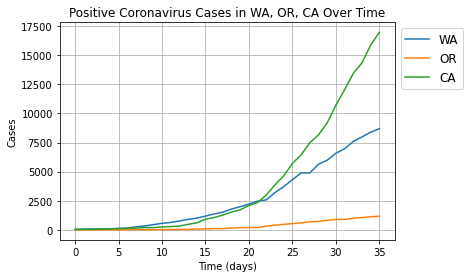

In [12]:
#now plot
plt.plot(waPos, label = 'WA') # plot points for WA deaths
plt.plot(orPos, label = 'OR') # plot points for OR deaths
plt.plot(caPos, label = 'CA') # plot points for CA deaths

# some graphic pazazz
plt.grid()
plt.title('Positive Coronavirus Cases in WA, OR, CA Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.legend(loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))


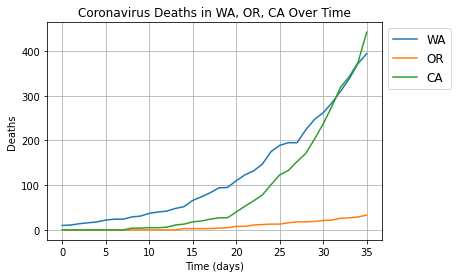

In [13]:
#now plot
plt.plot(waDeaths, label = 'WA') # plot points for WA deaths
plt.plot(orDeaths, label = 'OR') # plot points for OR deaths
plt.plot(caDeaths, label = 'CA') # plot points for CA deaths

# some graphic pazazz
plt.grid()
plt.title('Coronavirus Deaths in WA, OR, CA Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Deaths')
plt.legend(loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))

# Pandas
Alright, I was bored and wanted to try it out since I had some time.

In [14]:
import pandas as pd

# get data and display in a table
x = pd.read_csv('daily.csv')

# let pandas know we are using a date in date column
x['date']=pd.to_datetime(x['date'],format='%Y%m%d')
x.set_index(['date'],inplace=True)
x.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-04-08,AK,226.0,6842.0,NaN,NaN,27.0,NaN,NaN,NaN,NaN,...,27.0,7068,7068,7068,2,1.0,4.0,142.0,13.0,155.0
2020-04-08,AL,2369.0,16753.0,NaN,NaN,314.0,NaN,NaN,NaN,NaN,...,314.0,19122,19122,19122,1,10.0,43.0,3956.0,250.0,4206.0
2020-04-08,AR,1000.0,13530.0,NaN,76.0,130.0,NaN,43.0,30.0,39.0,...,130.0,14530,14530,14530,5,2.0,-18.0,838.0,54.0,892.0
2020-04-08,AS,0.0,20.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31,20,20,60,0.0,0.0,0.0,0.0,0.0
2020-04-08,AZ,2726.0,31838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34564,34564,34564,4,7.0,0.0,1038.0,151.0,1189.0


## Revisiting Part 1
Let's look at comparing NY and CA positive cases, but using pandas!

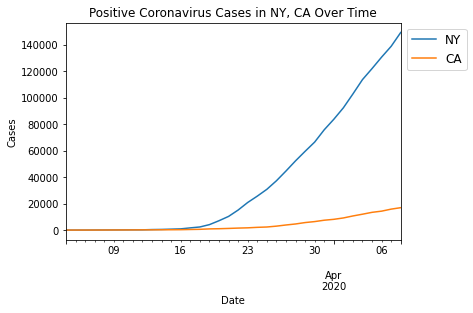

In [15]:
ny = 'NY'
ca = 'CA'

# grabbing output of plot() and saving in variable axes
axes = x[x['state'] == ny]['positive'].plot()
x[x['state'] == ca]['positive'].plot()

# set labels, title, legend
axes.set_title('Positive Coronavirus Cases in NY, CA Over Time')
axes.set_ylabel('Cases')
axes.set_xlabel('Date')
axes.legend([ny,ca], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))


## Revisiting Part 2
Let's look at comparing NY and CA deaths, but using panda!

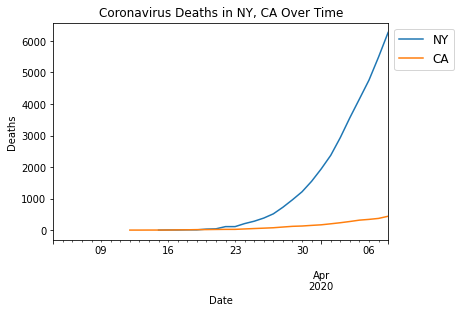

In [16]:
ny = 'NY'
ca = 'CA'

# grabbing output of plot() and saving in variable axes
axes = x[x['state'] == ny]['death'].plot()
x[x['state'] == ca]['death'].plot()

# set labels, title, legend
axes.set_title('Coronavirus Deaths in NY, CA Over Time')
axes.set_ylabel('Deaths')
axes.set_xlabel('Date')
axes.legend([ny,ca], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))

## Revisiting Part 3
Let's look at comparing WA, OR, and CA positive cases and deaths, but using panda!

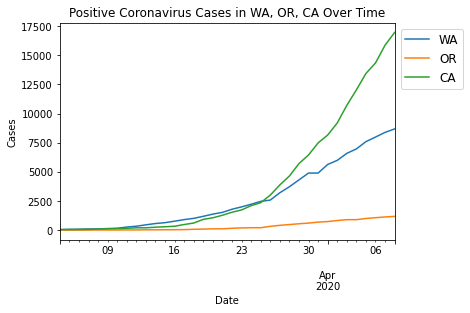

In [17]:
wa = 'WA'
ore = 'OR'
ca = 'CA'

# grabbing output of plot() and saving in variable axes
axes = x[x['state'] == wa]['positive'].plot()
x[x['state'] == ore]['positive'].plot()
x[x['state'] == ca]['positive'].plot()

# set labels, title, legend
axes.set_title('Positive Coronavirus Cases in WA, OR, CA Over Time')
axes.set_ylabel('Cases')
axes.set_xlabel('Date')
axes.legend([wa,ore,ca], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))

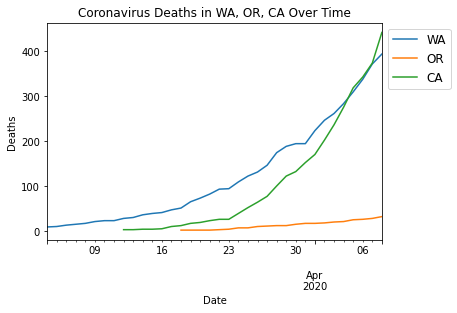

In [18]:
wa = 'WA'
ore = 'OR'
ca = 'CA'

# grabbing output of plot() and saving in variable axes
axes = x[x['state'] == wa]['death'].plot()
x[x['state'] == ore]['death'].plot()
x[x['state'] == ca]['death'].plot()

# set labels, title, legend
axes.set_title('Coronavirus Deaths in WA, OR, CA Over Time')
axes.set_ylabel('Deaths')
axes.set_xlabel('Date')
axes.legend([wa,ore,ca], loc='upper left',prop = {'size':12},bbox_to_anchor=(1,1))

Alright, that is way less work! Awesome!